In [1]:
from pathlib import Path
import os
import pickle
import random
import shutil

import glob2 as glob
import tensorflow as tf
from tensorflow.keras import callbacks, layers, models, Model
from azureml.core import Dataset, Workspace
from azureml.core.run import Run

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
workspace = Workspace.from_config()
workspace

Workspace.create(name='cgm-azureml-prod', subscription_id='9b82ecea-6780-4b85-8acf-d27d79028f07', resource_group='cgm-ml-prod')

In [4]:
dataset_name = "anon-realtime-evaluation"
dataset = Dataset.get_by_name(workspace, name=dataset_name)

In [16]:
mount_context = dataset.mount()

In [17]:
mount_context.start()  # this will mount the file streams

In [18]:
mount_context.mount_point

'/tmp/tmpgtr3f1wz'

In [19]:
! ls {mount_context.mount_point}

depthmaps  pointclouds	rgb


In [ ]:
! ls {mount_context.mount_point + '/depthmaps'}

In [6]:
# ! pip install tensorflow-addons
# ! pip install tensorflow==2.3.1

In [5]:
! pip list | grep tensorflow

tensorflow                            2.3.1
tensorflow-addons                     0.11.2
tensorflow-estimator                  2.3.0
tensorflow-gpu                        2.1.0


In [7]:
import sys
print(Path(os.getcwd()).parents[2])
sys.path.append(str(Path(os.getcwd()).parents[2]))  # src/ dir

from common.model_utils.utils import get_dataset_path, download_dataset

/mnt/batch/tasks/shared/LS_root/mounts/clusters/mhinsche-ds16/code/Users/mhinsche/cgm-ml/src


In [9]:
# Downlaod dataset
# DATA_DIR_ONLINE_RUN = Path("/tmp/data/")
# dataset_path = get_dataset_path(DATA_DIR_ONLINE_RUN, dataset_name)
# download_dataset(workspace, dataset_name, dataset_path)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

from data_utils.data_visualisation.visualization_utils import (IMAGE_TARGET_HEIGHT, 
    IMAGE_TARGET_WIDTH, REPO_DIR, show_pickle, path_to_ndarray, choose_a_pickle_file, get_datetime, py_load_pickle)

In [15]:
qrcode_path_ = Path("/tmp/data/anon-realtime-evaluation/depthmaps/1585015418-c5fsm1xtkt")
qrcode_path = str(qrcode_path_ / "100/")  # contains .p files
path_with_wildcard = os.path.join(qrcode_path, "*.p")
list_of_pickle_file_paths = sorted(glob.glob(path_with_wildcard))

In [16]:
list_of_pickle_file_paths

['/tmp/data/anon-realtime-evaluation/depthmaps/1585015418-c5fsm1xtkt/100/pc_1585015418-c5fsm1xtkt_1591875489591_100_000.p',
 '/tmp/data/anon-realtime-evaluation/depthmaps/1585015418-c5fsm1xtkt/100/pc_1585015418-c5fsm1xtkt_1591875489591_100_001.p',
 '/tmp/data/anon-realtime-evaluation/depthmaps/1585015418-c5fsm1xtkt/100/pc_1585015418-c5fsm1xtkt_1591875489591_100_002.p',
 '/tmp/data/anon-realtime-evaluation/depthmaps/1585015418-c5fsm1xtkt/100/pc_1585015418-c5fsm1xtkt_1591875489591_100_003.p',
 '/tmp/data/anon-realtime-evaluation/depthmaps/1585015418-c5fsm1xtkt/100/pc_1585015418-c5fsm1xtkt_1591875489591_100_004.p',
 '/tmp/data/anon-realtime-evaluation/depthmaps/1585015418-c5fsm1xtkt/100/pc_1585015418-c5fsm1xtkt_1591875489591_100_005.p',
 '/tmp/data/anon-realtime-evaluation/depthmaps/1585015418-c5fsm1xtkt/100/pc_1585015418-c5fsm1xtkt_1591875489591_100_006.p']

In [26]:
def show_pickle(pickle_file_path):
    depthmap, _targets = py_load_pickle(pickle_file_path)
    # depthmap = tf.reshape(depthmap, (IMAGE_TARGET_HEIGHT, IMAGE_TARGET_WIDTH))
    plt.imshow(depthmap.numpy(), cmap='gray', vmin=0, vmax=1)
    print(f"height: {_targets[0]:.2f} cm")

5 /tmp/data/anon-realtime-evaluation/depthmaps/1585015418-c5fsm1xtkt/100/pc_1585015418-c5fsm1xtkt_1591875489591_100_005.p
height: 104.90 cm


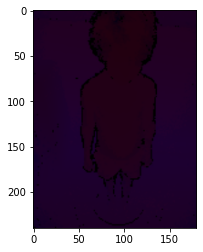

In [27]:
# Naive step visualization
i = 5

print(i, list_of_pickle_file_paths[i])
show_pickle(list_of_pickle_file_paths[i])
i += 1

In [28]:
pickle_file_path = list_of_pickle_file_paths[i]
depthmap, _targets = py_load_pickle(pickle_file_path)

In [29]:
depthmap.shape

TensorShape([240, 180, 3])

In [30]:
_targets

array([104.9], dtype=float32)